      Education  JoiningYear       City  PaymentTier  Age  Gender  \
0     Bachelors         2017  Bangalore            3   34    Male   
1     Bachelors         2013       Pune            1   28  Female   
2     Bachelors         2014  New Delhi            3   38  Female   
3       Masters         2016  Bangalore            3   27    Male   
4       Masters         2017       Pune            3   24    Male   
...         ...          ...        ...          ...  ...     ...   
4648  Bachelors         2013  Bangalore            3   26  Female   
4649    Masters         2013       Pune            2   37    Male   
4650    Masters         2018  New Delhi            3   27    Male   
4651  Bachelors         2012  Bangalore            3   30    Male   
4652  Bachelors         2015  Bangalore            3   33    Male   

      EverBenched  ExperienceInCurrentDomain  LeaveOrNot  
0               0                          0           0  
1               0                          3         

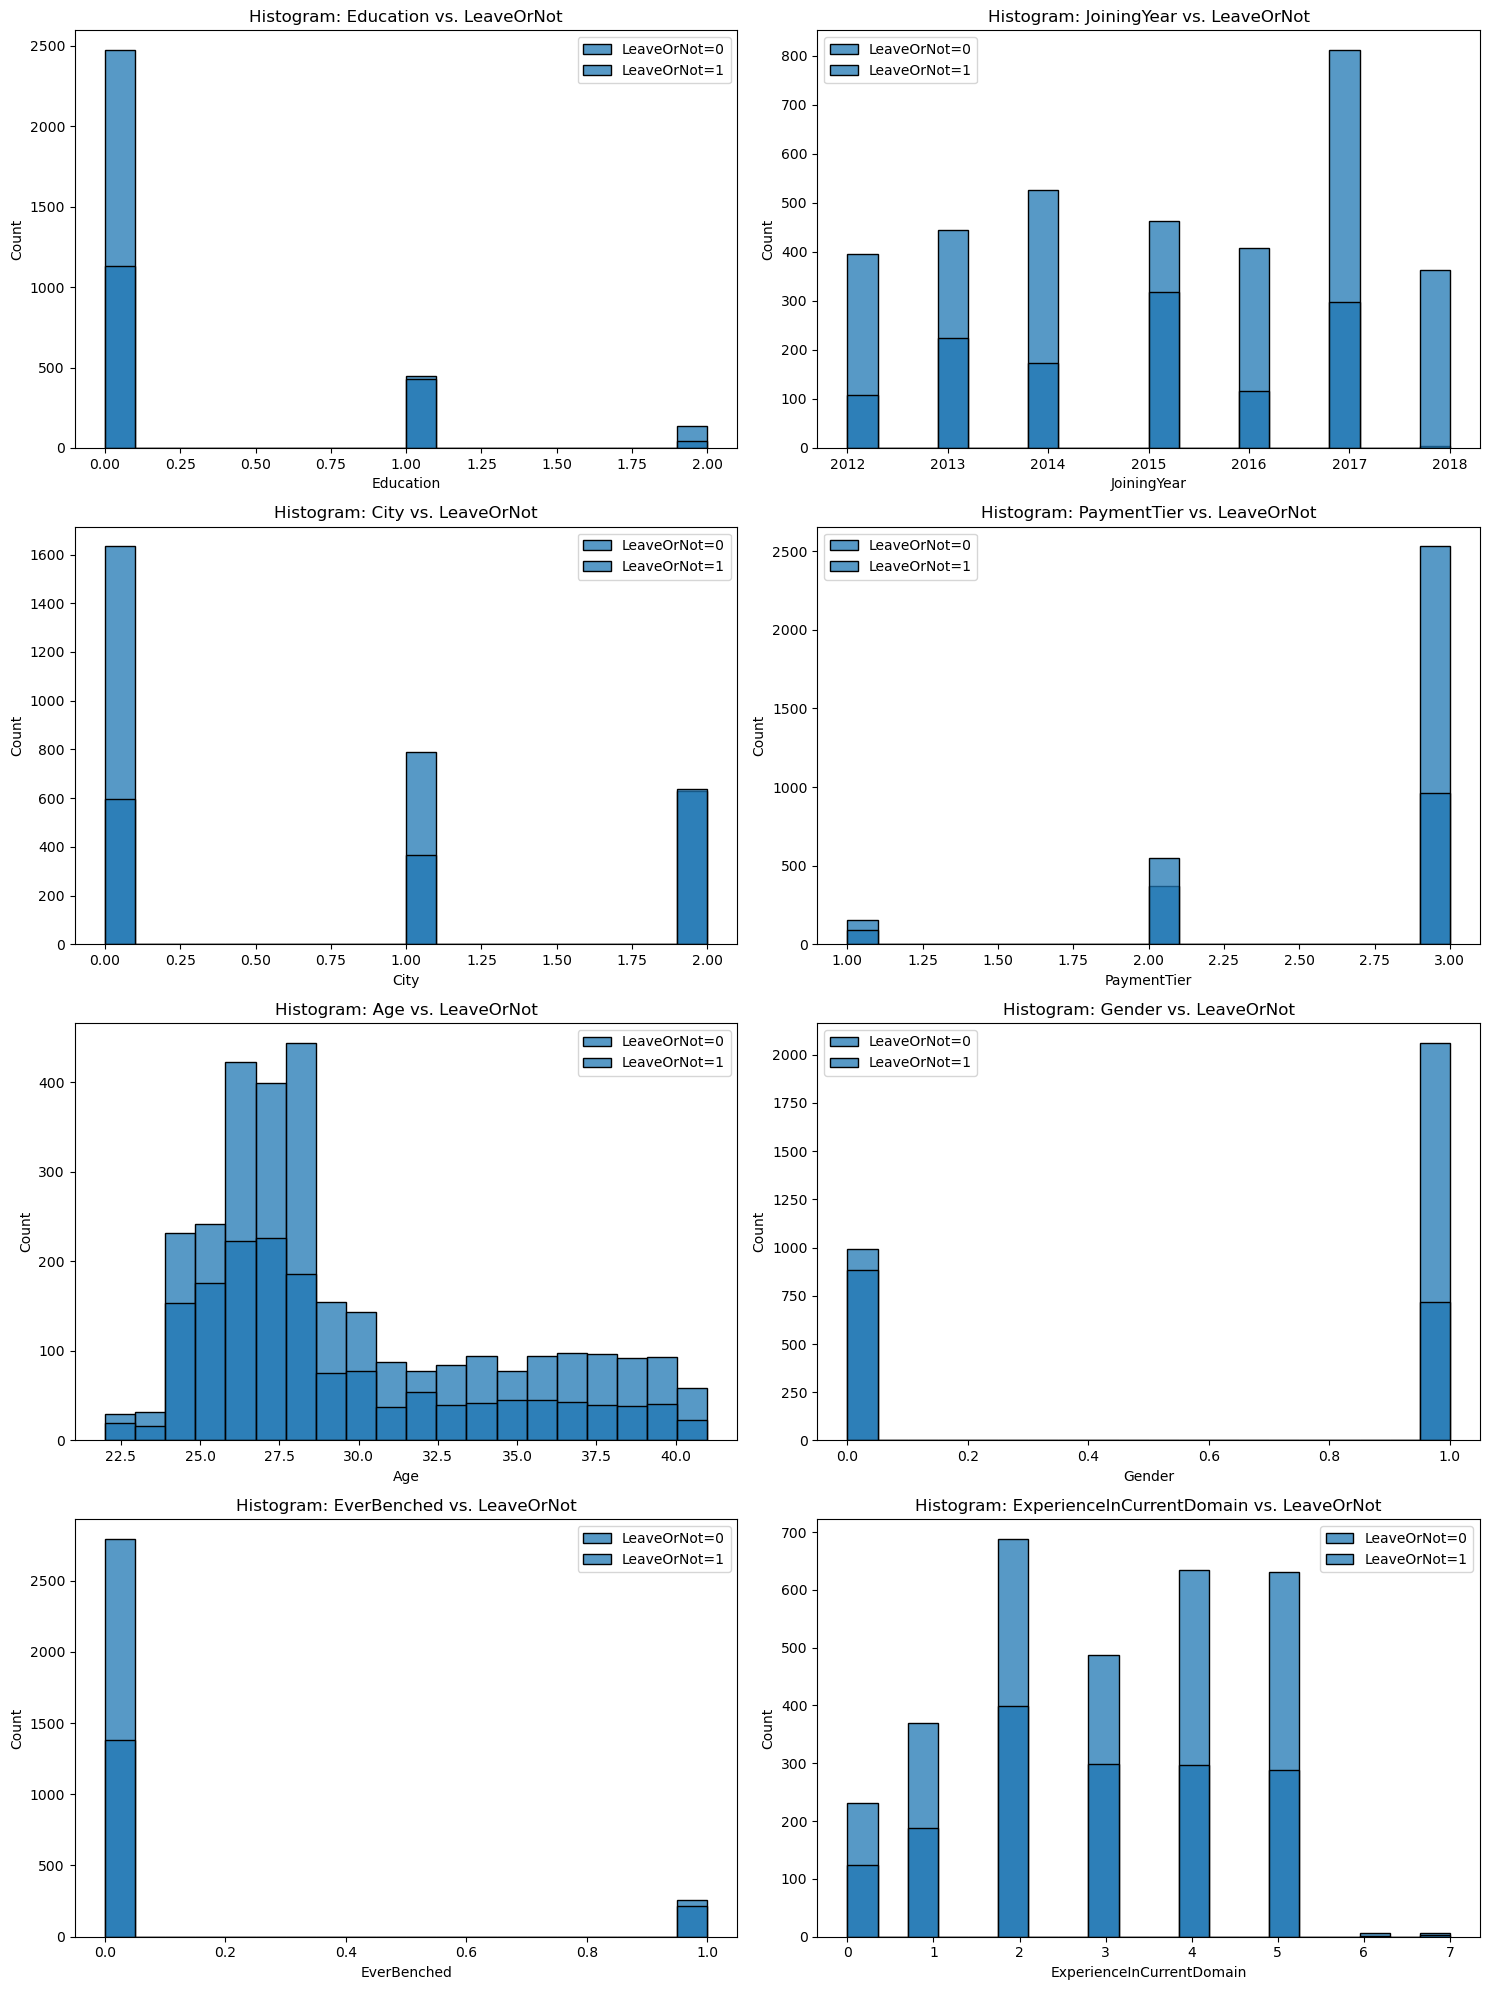

Model trained successfully.
Resampled Model Accuracy: 1.0
Resampled Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       611

    accuracy                           1.00       611
   macro avg       1.00      1.00      1.00       611
weighted avg       1.00      1.00      1.00       611

Accuracy: 1.0

Analyzing Implicit Bias for 'Education' vs. 'LeaveOrNot':


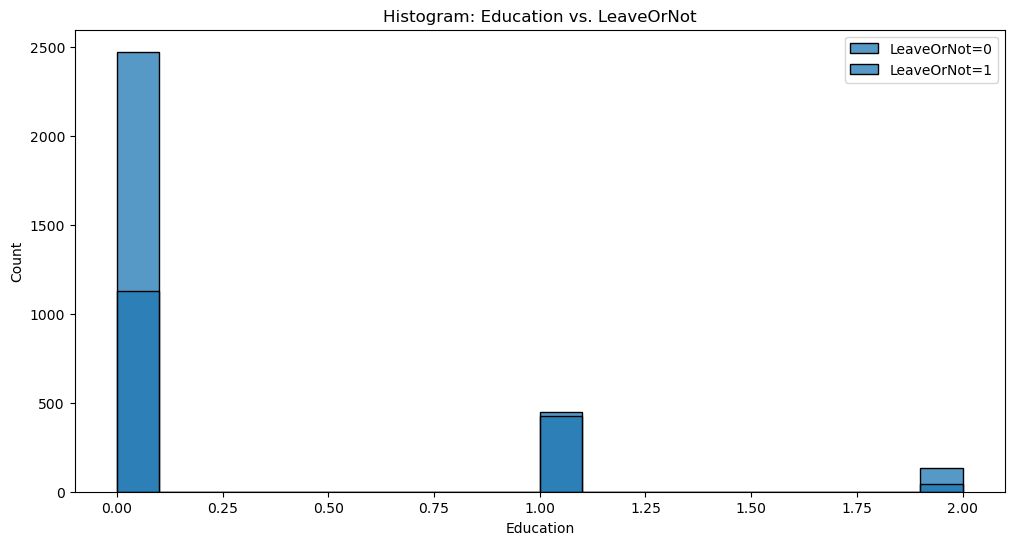

Statistical Parity Difference for Education and LeaveOrNot=0: -0.030364625691161856
NO SIGNIFICANT BIAS IS DETECTED IN Education COLUMN for LeaveOrNot=0.
Statistical Parity Difference for Education and LeaveOrNot=1: 0.0579395013969482
NO SIGNIFICANT BIAS IS DETECTED IN Education COLUMN for LeaveOrNot=1.

Analyzing Implicit Bias for 'JoiningYear' vs. 'LeaveOrNot':


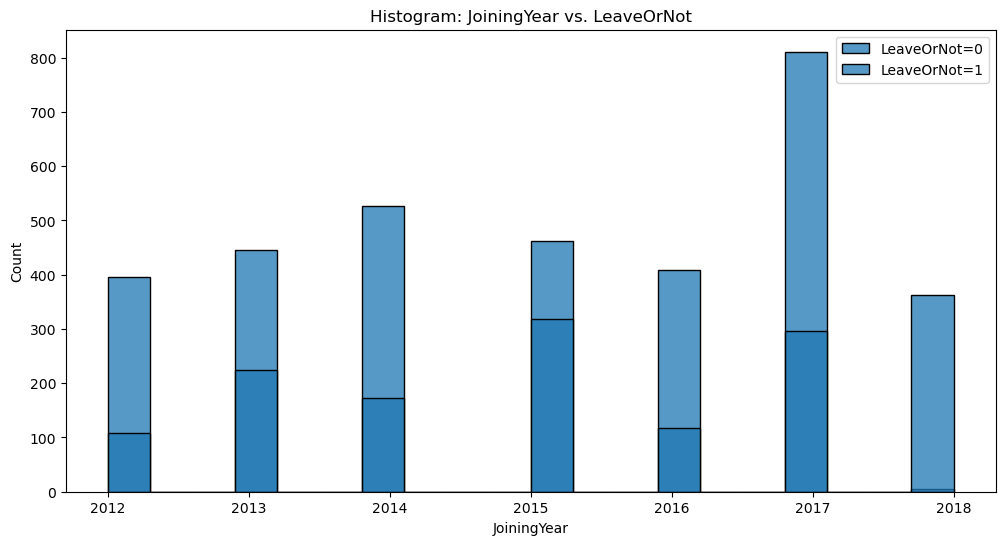

Statistical Parity Difference for JoiningYear and LeaveOrNot=0: -0.2450860783230837
IMPLICIT BIAS IS DETECTED IN JoiningYear COLUMN for LeaveOrNot=0.
Statistical Parity Difference for JoiningYear and LeaveOrNot=1: 0.4676548732002175
IMPLICIT BIAS IS DETECTED IN JoiningYear COLUMN for LeaveOrNot=1.

Analyzing Implicit Bias for 'City' vs. 'LeaveOrNot':


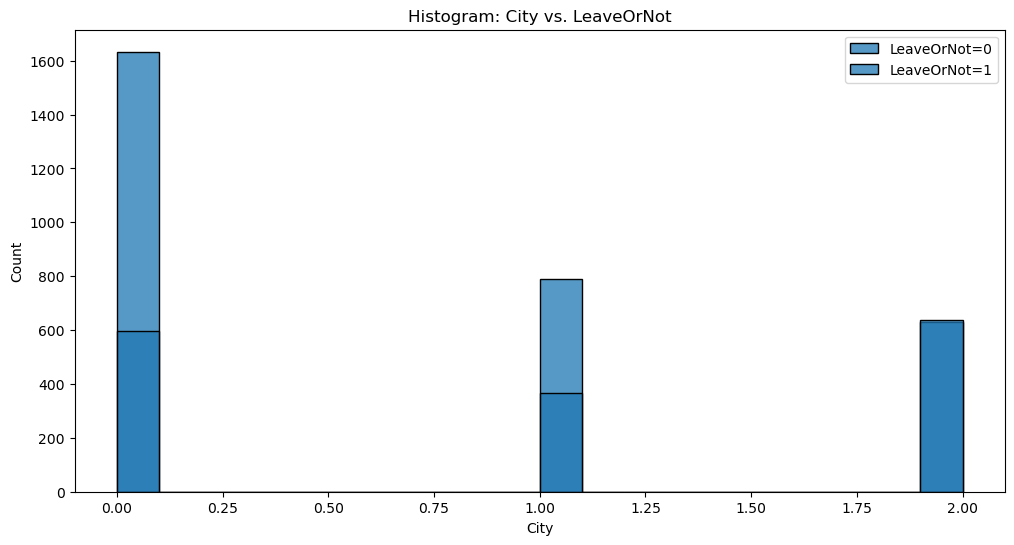

Statistical Parity Difference for City and LeaveOrNot=0: -0.12253835791200507
IMPLICIT BIAS IS DETECTED IN City COLUMN for LeaveOrNot=0.
Statistical Parity Difference for City and LeaveOrNot=1: 0.2338185041908447
IMPLICIT BIAS IS DETECTED IN City COLUMN for LeaveOrNot=1.

Analyzing Implicit Bias for 'PaymentTier' vs. 'LeaveOrNot':


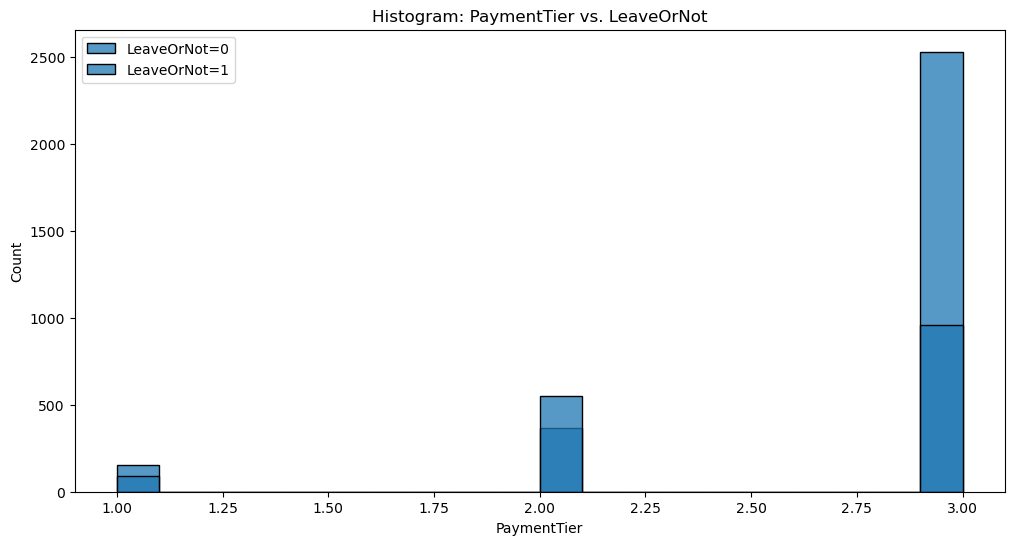

Statistical Parity Difference for PaymentTier and LeaveOrNot=0: 0.0803192598078688
NO SIGNIFICANT BIAS IS DETECTED IN PaymentTier COLUMN for LeaveOrNot=0.
Statistical Parity Difference for PaymentTier and LeaveOrNot=1: -0.15325918762088975
IMPLICIT BIAS IS DETECTED IN PaymentTier COLUMN for LeaveOrNot=1.

Analyzing Implicit Bias for 'Age' vs. 'LeaveOrNot':


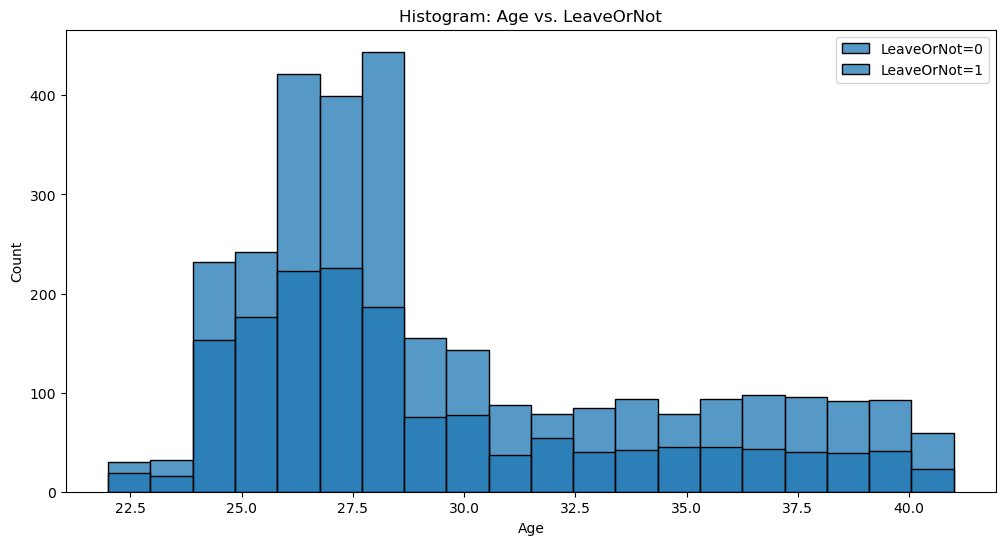

Statistical Parity Difference for Age and LeaveOrNot=0: 0.17860184663677714
IMPLICIT BIAS IS DETECTED IN Age COLUMN for LeaveOrNot=0.
Statistical Parity Difference for Age and LeaveOrNot=1: -0.34079464861379805
IMPLICIT BIAS IS DETECTED IN Age COLUMN for LeaveOrNot=1.

Analyzing Implicit Bias for 'Gender' vs. 'LeaveOrNot':


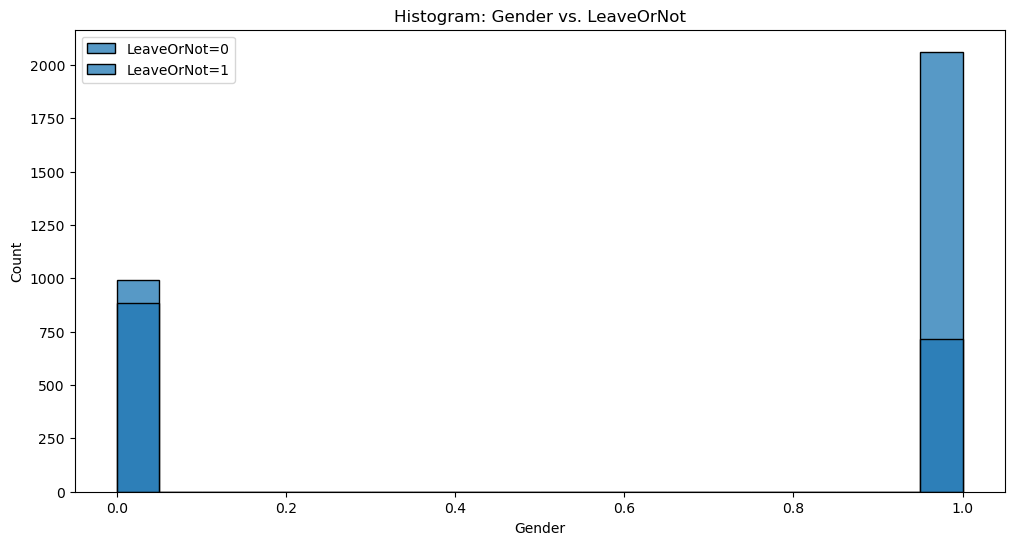

Statistical Parity Difference for Gender and LeaveOrNot=0: 0.07836707317510994
NO SIGNIFICANT BIAS IS DETECTED IN Gender COLUMN for LeaveOrNot=0.
Statistical Parity Difference for Gender and LeaveOrNot=1: -0.14953417150225656
IMPLICIT BIAS IS DETECTED IN Gender COLUMN for LeaveOrNot=1.

Analyzing Implicit Bias for 'EverBenched' vs. 'LeaveOrNot':


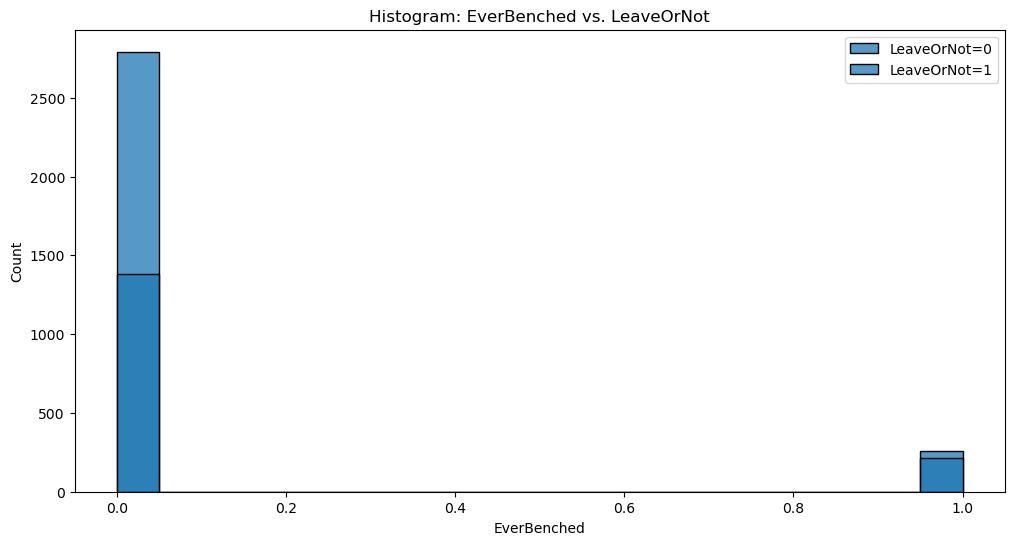

Statistical Parity Difference for EverBenched and LeaveOrNot=0: -0.01723973959863319
NO SIGNIFICANT BIAS IS DETECTED IN EverBenched COLUMN for LeaveOrNot=0.
Statistical Parity Difference for EverBenched and LeaveOrNot=1: 0.03289557812164194
NO SIGNIFICANT BIAS IS DETECTED IN EverBenched COLUMN for LeaveOrNot=1.

Analyzing Implicit Bias for 'ExperienceInCurrentDomain' vs. 'LeaveOrNot':


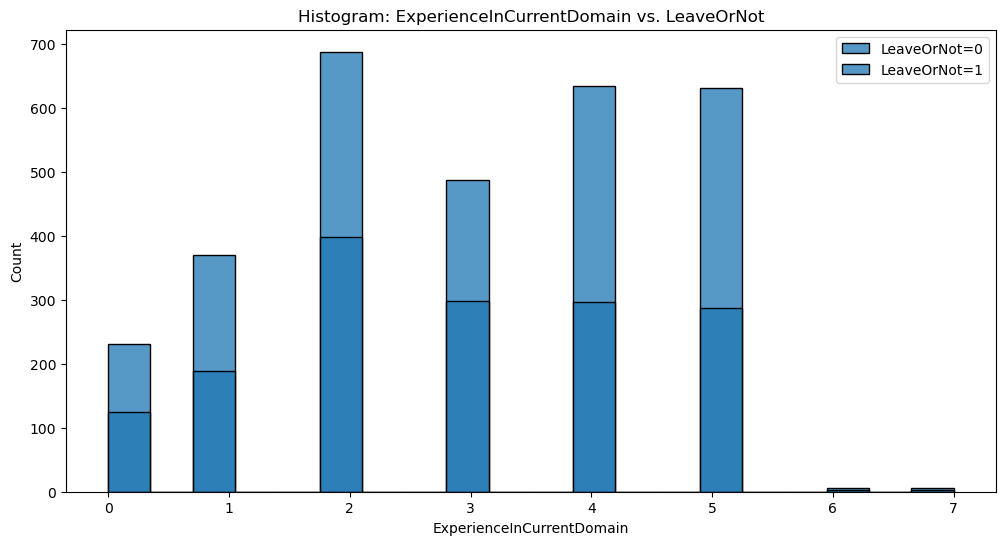

Statistical Parity Difference for ExperienceInCurrentDomain and LeaveOrNot=0: 0.03440669104717742
NO SIGNIFICANT BIAS IS DETECTED IN ExperienceInCurrentDomain COLUMN for LeaveOrNot=0.
Statistical Parity Difference for ExperienceInCurrentDomain and LeaveOrNot=1: -0.06565226735439511
NO SIGNIFICANT BIAS IS DETECTED IN ExperienceInCurrentDomain COLUMN for LeaveOrNot=1.
accuracy before bias mitigation :  0.7432867883995704


In [8]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from fairlearn.postprocessing import ThresholdOptimizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from fairlearn.reductions import DemographicParity,EqualizedOdds
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.reductions import GridSearch, DemographicParity, EqualizedOdds
# Load a dataset (e.g., adult census income dataset)
from datanalyzer import DataAnalyzer

from test3 import get_model_accuracy
from test4 import get_model_accuracy2 as gma

#accuracy = get_model_accuracy("DS01.csv", "IMDB_Rating")
accuracy2=gma("Employee.csv", "LeaveOrNot")
print("accuracy before bias mitigation : ",accuracy2)

data_analyzer =DataAnalyzer(data_path="Employee.csv", target_column="LeaveOrNot")
data_analyzer.load_data()
data_analyzer.preprocessing()
data_analyzer.visualize_data()
data_analyzer.bias_mitigation()
accuracy = data_analyzer.evaluate_resampled_model()
print(f"Accuracy: {accuracy}")
data_analyzer.check_implicit_bias()
print("accuracy before bias mitigation : ",accuracy2)
